In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels import api
from scipy import stats
from scipy.optimize import minimize

In [2]:
# generate an independent variable 
x = np.linspace(-10, 30, 100)


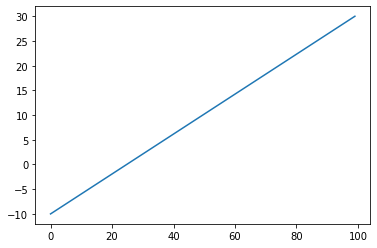

In [5]:
plt.plot(x)

In [6]:
# generate a normally distributed residual
e = np.random.normal(10, 5, 100)


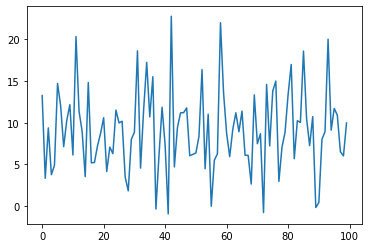

In [7]:
plt.plot(e)

In [8]:
# generate ground truth
y = 10 + 4*x + e
df = pd.DataFrame({'x':x, 'y':y})
df.head() 

,x,y
0,-10.000000,-16.737983
1,-9.595960,-25.069534
2,-9.191919,-17.395138
3,-8.787879,-21.398253
4,-8.383838,-18.644473


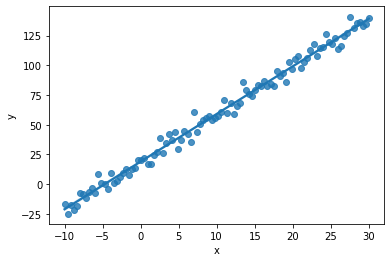

In [10]:
sns.regplot(x='x', y='y', data = df)
plt.show() 

In [11]:
features = api.add_constant(df.x)
model = api.OLS(y, features).fit()
model.summary() 

/Users/antoniovegas/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     8880.
Date:                Wed, 31 Aug 2022   Prob (F-statistic):           5.93e-98
Time:                        19:04:18   Log-Likelihood:                -301.11
No. Observations:                 100   AIC:                             606.2
Df Residuals:                      98   BIC:                             611.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.9561      0.654     28.989      0.000      17.658      20.254
x              4.0108      0.043     94.231      0.000       3.926       4.095
==============================================================================
Omnibus:                        3.676   Durbin-Watson:                   2.174
Prob(Omnibus):                  0.159   Jarque-Bera (JB):                3.045
Skew:                           0.401   Prob(JB):                        0.218
Kurtosis:                       3.297   Cond. No.                         20.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
res = model.resid
standard_dev = np.std(res)
standard_dev 

4.914266947005883

In [25]:
 # MLE function
 # ml modeling and neg LL calculation

def MLE_Norm(parameters):
    
    # extract parameters
    const, beta, std_dev = parameters
    
    # predict the output
    pred = const + beta*x
    
    # Calculate the log-likelihood for normal distribution
    LL = np.sum(stats.norm.logpdf(y, pred, std_dev))
    
    # Calculate the negative log-likelihood
    neg_LL = -1*LL
    
    print(parameters)
    
    return neg_LL 

In [26]:
print(np.array([2,2,2]))

[2 2 2]


In [27]:
 # minimize arguments: function, intial_guess_of_parameters, method
mle_model = minimize(MLE_Norm, np.array([1,1,1]), method='L-BFGS-B')
mle_model 

[1. 1. 1.]
[1.00000001 1.         1.        ]
[1.         1.00000001 1.        ]
[1.         1.         1.00000001]
[1.01307477 1.24215645 1.97014911]
[1.01307478 1.24215645 1.97014911]
[1.01307477 1.24215646 1.97014911]
[1.01307477 1.24215645 1.97014912]
[1.01698859 1.31353466 2.09779668]
[1.0169886  1.31353466 2.09779668]
[1.01698859 1.31353467 2.09779668]
[1.01698859 1.31353466 2.09779669]
[1.03971668 1.72077459 2.61566294]
[1.03971669 1.72077459 2.61566294]
[1.03971668 1.7207746  2.61566294]
[1.03971668 1.72077459 2.61566295]
[1.06643239 2.18383595 3.00276573]
[1.0664324  2.18383595 3.00276573]
[1.06643239 2.18383596 3.00276573]
[1.06643239 2.18383595 3.00276574]
[1.11228546 2.93327837 3.42192245]
[1.11228547 2.93327837 3.42192245]
[1.11228546 2.93327838 3.42192245]
[1.11228546 2.93327837 3.42192246]
[1.17102071 3.77810023 3.71820017]
[1.17102072 3.77810023 3.71820017]
[1.17102071 3.77810024 3.71820017]
[1.17102071 3.77810023 3.71820018]
[1.23826849 4.47380863 3.88071217]
[1.238268

      fun: 301.1081129608783
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-5.68434142e-05,  3.12638806e-04, -6.82121030e-05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 136
      nit: 28
     njev: 34
   status: 0
  success: True
        x: array([18.9560495 ,  4.01078266,  4.91425854])